<h1 align="center">Funcții de mai multe variabile</h1>
<h6 align="center">Șerbu Vlad Gabriel - 312AA</h6>

## Introducere

Se pune problema analizei funcțiilor cu mai mulți parametrii reali și cu valori în $\mathbb{R}$:

$$
f : D \subseteq \mathbb{R}^n \to \mathbb{R}
$$

Urmărim următoarele obiective:

* realizarea graficelor
* calculul simbolic al gradientelor, al divergențelor, al rotorilor, cu interpretare grafică

### Exemplele vizate

$$
f : \mathbb{R}^2 \to \mathbb{R} \\
f(x, y) = x^3 + y^3 - 6xy
$$

$$
g : \mathbb{R}^2 \to \mathbb{R} \\
g(x, y) = \sin{x}\cos{y}
$$


## Reprezentare grafică

Reprezentarea grafică se realizează numeric, prin calculul funției pentru un număr mare de valori aflate într-o submulțime a domeniului.

Pentru calculul numeric vom folosi librăria Python **numpy**, iar pentru reprezentarea efectivă, **matplotlib**.

Ne alegem $ D = \left\{ (x, y) \in \mathbb{R} | x \in [-6, 6], y \in [-6, 6] \right\} $

Pentru a reprezenta intervalul în Python folosim funcția numpy **meshgrid**.

In [1]:
import numpy as np
from pprint import pprint

# Cream intervalele pentru x, y
x = np.linspace(-6, 6, 4)
y = np.linspace(-6, 6, 4)

X, Y = np.meshgrid(x, y)

pprint(X)
pprint(Y)

array([[-6., -2.,  2.,  6.],
       [-6., -2.,  2.,  6.],
       [-6., -2.,  2.,  6.],
       [-6., -2.,  2.,  6.]])
array([[-6., -6., -6., -6.],
       [-2., -2., -2., -2.],
       [ 2.,  2.,  2.,  2.],
       [ 6.,  6.,  6.,  6.]])


Pentru a calcula valorile în punctele dorite este suficient să modelăm funția în Python, folosind cele 2 grid-uri de valori ca argumente. Vom folosi funcția exemplificată $f$.

In [2]:
def f(x, y):
    return x ** 3 + y ** 3 - 6 * x * y

Z = f(X, Y)

pprint(Z)

array([[-648., -296., -136.,  216.],
       [-296.,  -40.,   24.,  280.],
       [-136.,   24.,   -8.,  152.],
       [ 216.,  280.,  152.,  216.]])


În continuare afișăm funcția ca o figură tridimensională.

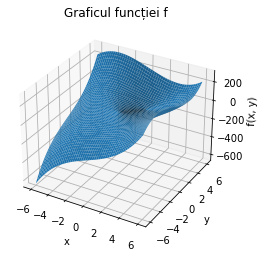

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.linspace(-6, 6, 1000)
y = np.linspace(-6, 6, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, Z)
ax.set(xlabel='x', ylabel='y', zlabel='f(x, y)', title='Graficul funcției f')

plt.show()

Graficul funcției poate fi reprezentat și bidimensional, culoarea ținând rolul axei z.

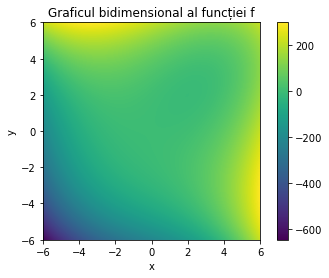

In [4]:
fig, ax = plt.subplots()

cm = ax.pcolormesh(X, Y, Z, shading='auto')
ax.set_aspect('equal')

ax.set(xlabel='x', ylabel='y', title='Graficul bidimensional al funcției f')

fig.colorbar(cm)

plt.show()

Asemenea se procedează și pentru funcția $g$.

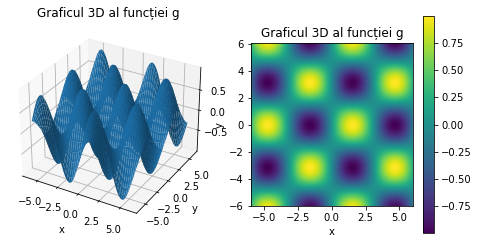

In [5]:
def g_numeric(x, y):
    return np.sin(x) * np.cos(y)

x = np.linspace(-6, 6, 1000)
y = np.linspace(-6, 6, 1000)
X, Y = np.meshgrid(x, y)
Z = g_numeric(X, Y)

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set(xlabel='x', ylabel='y', title='Graficul 3D al funcției g')

ax = fig.add_subplot(1, 2, 2)
cm = ax.pcolormesh(X, Y, Z, shading='auto')
ax.set(xlabel='x', ylabel='y', title='Graficul 3D al funcției g')
ax.set_aspect('equal')
fig.colorbar(cm)

plt.show()

## Gradient

Gradientul pentru funcții de două variabile este definit ca fiind vecotrul $\nabla f$, unde

$$
\nabla = \left(\begin{matrix}
    \frac{\delta}{\delta x} \\
    \frac{\delta}{\delta y}
\end{matrix}\right)
$$

prentru funcții de două variabile. $\nabla f$ este astfel un vector de funcții și, împreună cu axele $x$ și $y$, definește un spațiu vectorial.

$$
\nabla f = \left(\begin{matrix}
    \frac{\delta f}{\delta x} \\
    \frac{\delta f}{\delta y}
\end{matrix}\right)
$$

Petnru a calcula programatic derivatele parțiale folosim librăria de calcul simbolic **sympy**.

In [6]:
import sympy as sp

x, y = sp.symbols('x y')
fx = sp.Derivative(f(x, y), x)
sp.Eq(fx, fx.doit())

Eq(Derivative(x**3 - 6*x*y + y**3, x), 3*x**2 - 6*y)

In [7]:
fx = fx.doit()

fy = sp.Derivative(f(x, y), y)
sp.Eq(fy, fy.doit())

Eq(Derivative(x**3 - 6*x*y + y**3, y), -6*x + 3*y**2)

In [8]:
fy = fy.doit()

nablaf = sp.symbols('∇f')
gradient_f = sp.Array([[fx], [fy]])
sp.Eq(nablaf, gradient_f)

Eq(∇f, [[3*x**2 - 6*y], [-6*x + 3*y**2]])

Gradientul definește un câmp vectorial pe care îl vom reprezenta grafic.

$$
\vec{F}(x, y) = \left( 3x^2 - 6y \right) \vec{i} + \left(6x + 3y^2\right) \vec{j}
$$

Pentru a putea folosii derivatele parțiale în cadrul afișajului grafic, expresiile simbolice trebuie transformate în funcții numerice compatibile cu tipurile de date din **numpy**.

In [9]:
def calc_gradient_f(x, y):
    x_sym, y_sym = sp.symbols('x y')
    fx_l = sp.lambdify((x_sym, y_sym), fx.doit())
    fy_l = sp.lambdify((x_sym, y_sym), fy.doit())
    return fx_l(x, y), fy_l(x, y)

calc_gradient_f(1, 1)

(-3, -3)

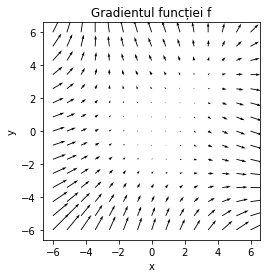

In [10]:
x = np.linspace(-6, 6, 15) 
y = np.linspace(-6, 6, 15) 

X, Y = np.meshgrid(x, y) 

U, V = calc_gradient_f(X, Y)
  
fig, ax = plt.subplots() 
ax.quiver(X, Y, U, V)

ax.set(xlabel='x', ylabel='y', title='Gradientul funcției f')
ax.set_aspect('equal') 

plt.show() 

Aceeași operațiune poate fi realizată și pentru funcția g. Funcția va fi redefinită pentru a folosi funcțiile trigonometrice din cadrul **sympy**.

In [11]:
def g_simbolic(x, y):
    return sp.sin(x) * sp.cos(y)

x, y = sp.symbols('x y')
gx = sp.Derivative(g_simbolic(x, y), x).doit()
gy = sp.Derivative(g_simbolic(x, y), y).doit()

nablag = sp.symbols('∇g')
gradient_g = sp.Array([[gx], [gy]])
sp.Eq(nablag, gradient_g)

Eq(∇g, [[cos(x)*cos(y)], [-sin(x)*sin(y)]])

$$
\vec{G}(x, y) = \left(\cos{x}\cos{y}\right) \vec{i} +  \left(\sin{x}\sin{y}\right) \vec{j}
$$

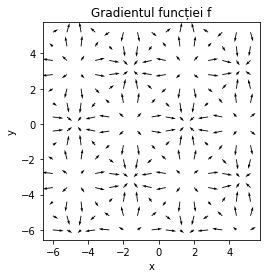

In [12]:
def calc_gradient_g(x, y):
    x_sym, y_sym = sp.symbols('x y')
    gx_l = sp.lambdify((x_sym, y_sym), gx)
    gy_l = sp.lambdify((x_sym, y_sym), gy)
    return gx_l(x, y), gy_l(x, y)

x = np.arange(-6, 6, 0.8) 
y = np.arange(-6, 6, 0.8) 

X, Y = np.meshgrid(x, y)

U, V = calc_gradient_g(X, Y)

fig, ax = plt.subplots() 
ax.quiver(X, Y, U, V)

ax.set(xlabel='x', ylabel='y', title='Gradientul funcției f')
ax.set_aspect('equal') 

plt.show() 

## Divergență

Divergența unui câmp vectorial $\vec{F}$ este produsul $\nabla \cdot \vec{F}$. Pentru $\vec{F}(x, y) = P(x, y) \vec{i} + Q(x, y) \vec{j}$

$$
div \vec{F} = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y}
$$

Pentru spațiul $\vec{F}$, componentele $P$ și $Q$ sunt derivatele parțiale ale funcției $f$. 

$$
div(\vec{F}) = \frac{\partial f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
$$

In [13]:
x, y = sp.symbols('x y')

fxx = sp.Derivative(fx, x).doit()
fyy = sp.Derivative(fy, y).doit()

sp.Array([[fxx], [fyy]])

[[6*x], [6*y]]

$$
div(\vec{F}) = 6x + 6y
$$

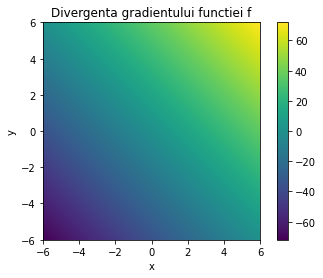

In [14]:
x, y = sp.symbols('x y')

div_f = sp.lambdify((x, y), fxx  + fyy)

x = np.linspace(-6, 6, 1000)
y = np.linspace(-6, 6, 1000)

X, Y = np.meshgrid(x, y) 

Z = div_f(X, Y)

fig, ax = plt.subplots()

cm = ax.pcolormesh(X, Y, Z, shading='auto')
ax.set(xlabel='x', ylabel='y', title='Divergenta gradientului functiei f')
ax.set_aspect('equal')

fig.colorbar(cm)

plt.show()

Asementea se procedează și pentru spațiul $g$.

$$
div(\vec{G}) = \frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2}
$$

In [15]:
x, y = sp.symbols('x y')

gxx = sp.Derivative(gx, x).doit()
gyy = sp.Derivative(gy, y).doit()

sp.Array([[gxx], [gyy]])

[[-sin(x)*cos(y)], [-sin(x)*cos(y)]]

$$
div(\vec{G}) = -\sin{x}\cos{y} -\sin{x}\cos{y} = -2\sin{x}\cos{y}
$$

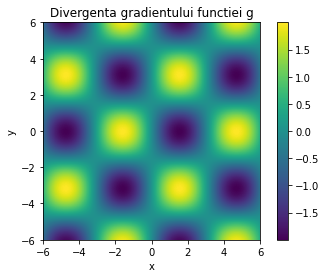

In [16]:
x, y = sp.symbols('x y')

div_g = sp.lambdify((x, y), gxx  + gyy)

x = np.linspace(-6, 6, 1000)
y = np.linspace(-6, 6, 1000)

X, Y = np.meshgrid(x, y) 

Z = div_g(X, Y)

fig, ax = plt.subplots()

cm = ax.pcolormesh(X, Y, Z, shading='auto')
ax.set(xlabel='x', ylabel='y', title='Divergenta gradientului functiei g')
ax.set_aspect('equal')

fig.colorbar(cm)

plt.show()

## Rotor

Rotorul este o proprietate a unui camp vectorial tridimensional. Am putea extinde câmpurile generate de gradiente la 3 dimensiuni, dar, întrucât se poate arăta că rotorul unui gradient este întotdeauna nul<sup>[1]</sup>, preferăm să definit un câmp vectorial nou:

$$
\vec{H}(x, y, z) = h_1(x, y, z) \cdot \vec{i} + h_2(x, y, z) \cdot \vec{j} + h_3(x, y, z) \cdot \vec{k} \\
h_1, h_2, h_3 : \mathbb{R}^3 \to \mathbb{R} \\
h_1(x, y, z) = x^3 + y^3 \\
h_2(x, y, z) = y^2 \\
h_3(x, y, z) = -2yz - y \\
$$

### Reprezentare grafică

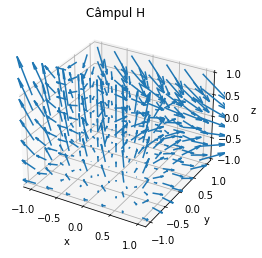

In [17]:
def h1(x, y, z):
    return x ** 3 + y ** 3

def h2(x, y, z):
    return y ** 2

def h3(x, y, z):
    return -2 * y * z - y

def h(x, y, z):
    return h1(x, y, z), h2(x, y, z), h3(x, y, z)

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.linspace(-1, 1, 7), np.linspace(-1, 1, 7), np.linspace(-1, 1, 7)
X, Y, Z = np.meshgrid(x, y, z)

U, V, W = h(X, Y, Z)

ax.quiver(X, Y, Z, U, V, W, length=0.2)
ax.set(xlabel='x', ylabel='y', zlabel='z', title='Câmpul H')

plt.show()

### Divergența

$$
div(\vec{H}) = \frac{\partial h_1}{\partial x} + \frac{\partial h_2}{\partial y} + \frac{\partial h_3}{\partial z}
$$

In [18]:
x, y, z = sp.symbols('x y z')

h1x = sp.Derivative(h1(x, y, z), x).doit()
h2y = sp.Derivative(h2(x, y, z), y).doit()
h3z = sp.Derivative(h3(x, y, z), z).doit()

sp.Eq(sp.symbols('∇h'), h1x + h2y + h3z)

Eq(∇h, 3*x**2)

$$
div(\vec{H}) = 3x^2
$$

Întrucât divergența presupune reprezentarea unei funcții cu domeniu tridimensional și codomeniu unidimensional, o vom reprezenta suprapusă cu graficul, spațiului vectorial, unde la originile vectorilor vor fi plasate puncte roșii, de opactiate porporțională cu valoarea divergenței.

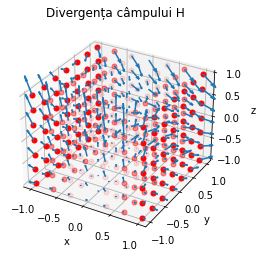

In [19]:
x, y, z = sp.symbols('x y z')
div_h = sp.lambdify((x, y, z), h1x + h2y + h3z)

x, y, z = np.linspace(-1, 1, 7), np.linspace(-1, 1, 7), np.linspace(-1, 1, 7)
X, Y, Z = np.meshgrid(x, y, z)

U, V, W = h(X, Y, Z)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.quiver(X, Y, Z, U, V, W, length=0.1)

for i in x:
    for j in y:
        for k in z:
            ax.plot([i], [j], [k], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5, alpha=div_h(i, j, k)/3)

ax.set(xlabel='x', ylabel='y', zlabel='z', title='Divergența câmpului H')            

plt.show()

### Rotorul

Rotorul este definit ca produsul vectorial dintre $\nabla$ și spațiul vectorial.

$$
rot(\vec{H}) = \nabla \times \vec{H} = \left| \begin{matrix}
\vec{i} & \vec{j} & \vec{k} \\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\
h_1 & h_2 & h_3 \end{matrix} \right|
$$

$$
rot(\vec{H}) = \left(\frac{\partial h_3}{\partial y} - \frac{\partial h_2}{\partial z}\right) \vec{i}
+ \left(\frac{\partial h_1}{\partial z} - \frac{\partial h_3}{\partial x}\right) \vec{j}
+ \left(\frac{\partial h_2}{\partial x} - \frac{\partial h_1}{\partial y}\right) \vec{k}
$$

In [20]:
x, y, z = sp.symbols('x y z')

h1y = sp.Derivative(h1(x, y, z), y).doit()
h1z = sp.Derivative(h1(x, y, z), z).doit()
h2x = sp.Derivative(h2(x, y, z), x).doit()
h2z = sp.Derivative(h2(x, y, z), z).doit()
h3x = sp.Derivative(h3(x, y, z), x).doit()
h3y = sp.Derivative(h3(x, y, z), y).doit()

hr_i = sp.lambdify((x, y, z), h3y - h2z)
hr_j = sp.lambdify((x, y, z), h1z - h3x)
hr_k = sp.lambdify((x, y, z), h2x - h1y)

sp.Array([[h3y - h2z], [h1z - h3x], [h2x - h1y]])

[[-2*z - 1], [0], [-3*y**2]]

$$
rot(\vec{H}) = \left( -2z - 1 \right) \vec{i} - 3y^2 \cdot \vec{k}
$$

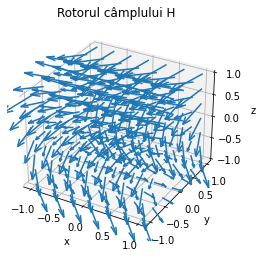

In [21]:
def calc_rotor_h(x, y, z):
    return hr_i(x, y, z), hr_j(x, y, z), hr_k(x, y, z)

fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y, Z = np.meshgrid(np.linspace(-1, 1, 7),
                      np.linspace(-1, 1, 7),
                      np.linspace(-1, 1, 7))

U, V, W = calc_rotor_h(X, Y, Z)

ax.quiver(X, Y, Z, U, V, W, length=0.2)
ax.set(xlabel='x', ylabel='y', zlabel='z', title='Rotorul câmplului H')

plt.show()

## Bibliografie

\[1\]: https://mathinsight.org/curl_gradient_zero

Teoria matematică:

* https://adrianmanea.xyz/docs/20-21-acs-m1/m1-20-21.pdf
* https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives

Documentație librării Python:

* https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
* https://docs.sympy.org/latest/tutorial/